<a href="https://colab.research.google.com/github/Vijayak08/wine-quality-prediction/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd

In [186]:
df = pd.read_csv("/content/WineQT.csv")

In [187]:
df.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [188]:
df.shape

(1143, 13)

In [189]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [190]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [191]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [192]:
df.duplicated().sum()

0

In [193]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

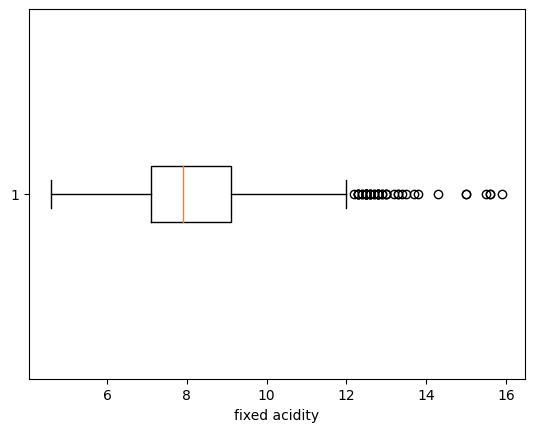

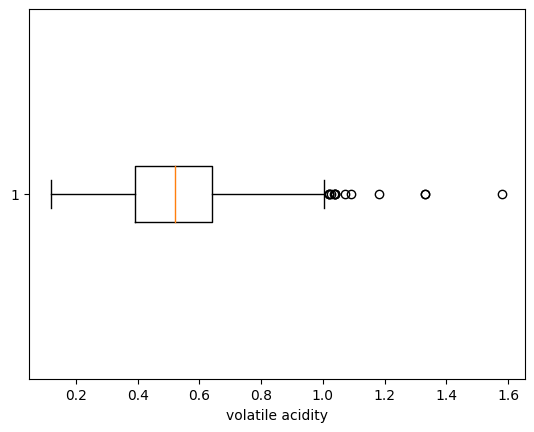

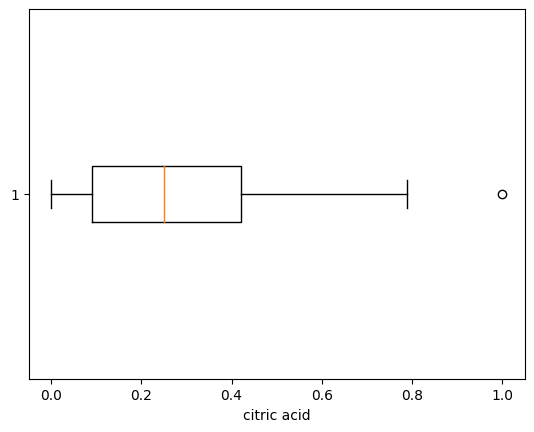

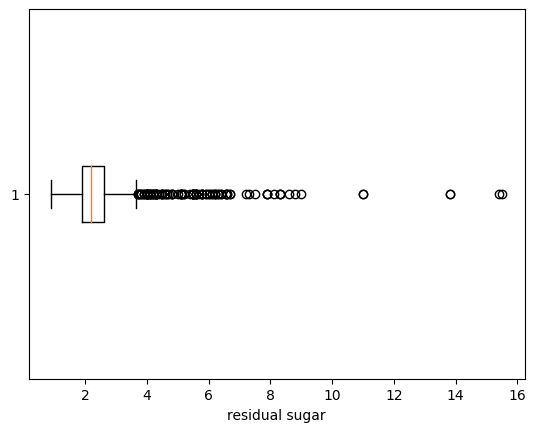

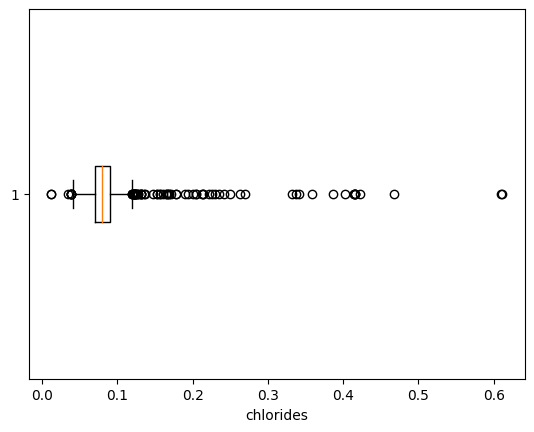

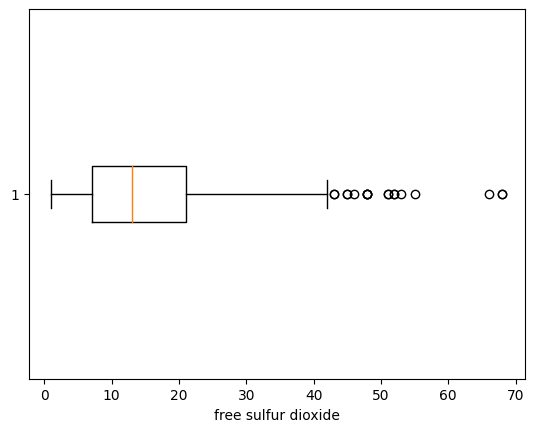

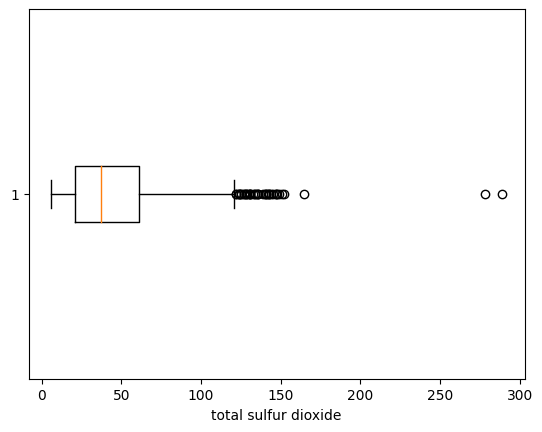

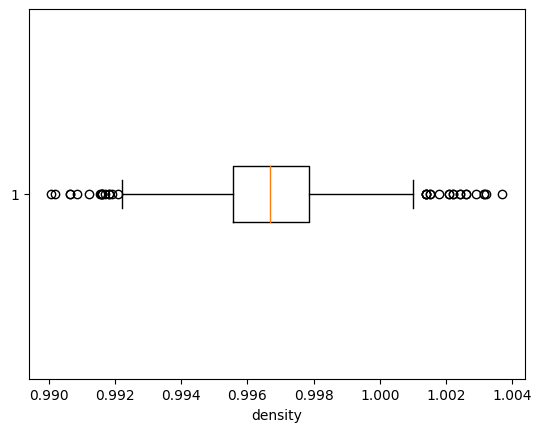

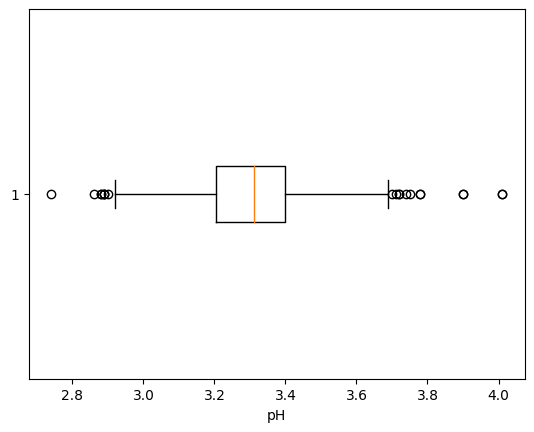

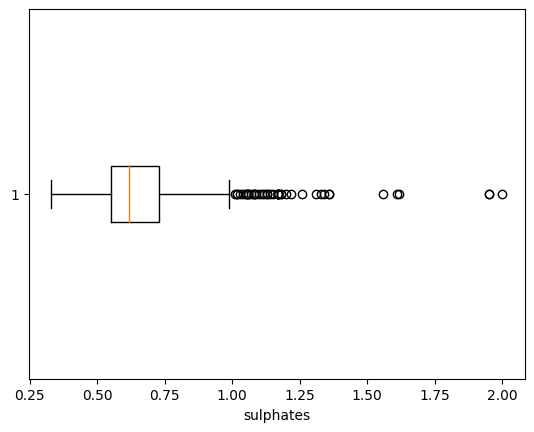

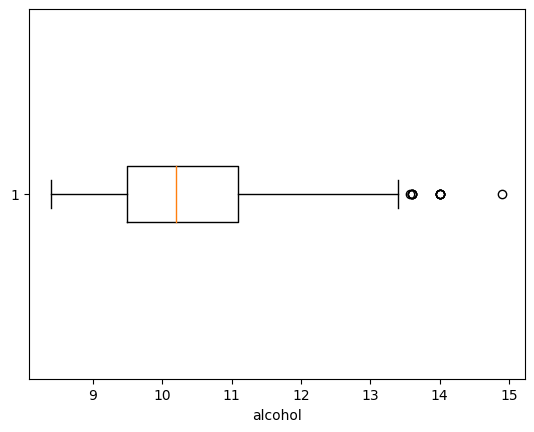

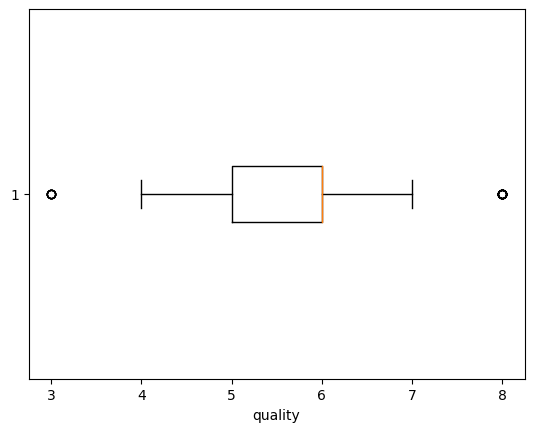

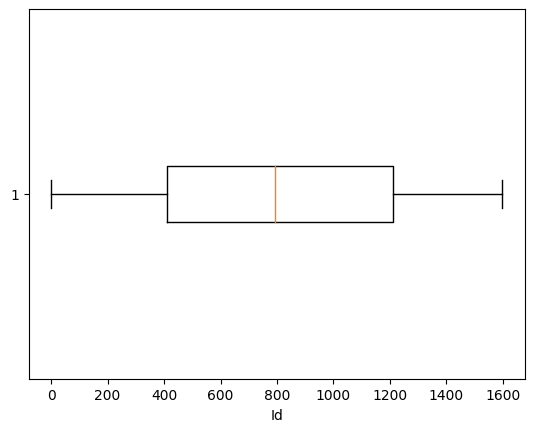

In [194]:
#checking for outliers
import matplotlib.pyplot as plt


for i in dict(df.dtypes):
  if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
    plt.boxplot(df[i],vert=False)
    plt.xlabel(i)
    plt.show()


In [195]:
#function for treating outliers
import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers


In [196]:
#treating outliers using median imputation

for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)






Column:  fixed acidity
Outliers from Z-scores method:  [15.0, 15.0, 13.8, 13.7, 15.6, 14.3, 15.5, 15.6, 15.9]
After treatment: 
Outliers from Z-scores method:  [13.3, 13.4, 13.5, 13.3, 13.2]
Column:  volatile acidity
Outliers from Z-scores method:  [1.33, 1.33, 1.09, 1.58, 1.18]
After treatment: 
Outliers from Z-scores method:  [1.07]
Column:  citric acid
Outliers from Z-scores method:  [1.0]
After treatment: 
Outliers from Z-scores method:  []
Column:  residual sugar
Outliers from Z-scores method:  [7.3, 7.2, 11.0, 11.0, 7.9, 7.9, 6.7, 6.6, 15.5, 8.3, 7.9, 8.6, 7.5, 6.6, 9.0, 8.8, 8.1, 8.3, 8.3, 15.4, 13.8, 13.8, 6.7]
After treatment: 
Outliers from Z-scores method:  [5.5, 5.9, 5.5, 5.5, 5.5, 5.6, 6.4, 5.6, 5.6, 5.8, 5.8, 6.2, 5.2, 6.55, 6.55, 6.1, 5.8, 5.15, 6.3, 5.1, 5.6, 6.0, 6.0, 5.9, 6.2, 6.4, 5.5, 5.5, 5.5, 6.2, 5.6, 5.8, 6.3, 5.4, 6.1, 5.1, 5.1, 5.2, 5.7, 5.1]
Column:  chlorides
Outliers from Z-scores method:  [0.341, 0.332, 0.467, 0.61, 0.27, 0.337, 0.263, 0.611, 0.358, 0.25, 

In [197]:
#distinguish between categorical and continuous colums

df.nunique()

fixed acidity             84
volatile acidity         131
citric acid               76
residual sugar            65
chlorides                113
free sulfur dioxide       46
total sulfur dioxide     129
density                  379
pH                        84
sulphates                 75
alcohol                   59
quality                    5
Id                      1143
dtype: int64

In [198]:
df.shape


(1143, 13)

In [199]:
df=df.drop('Id',axis=1)

In [200]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0


In [201]:
#checking for null values
df.replace('?',np.NaN)
for i in df:
  print(i," : ",df[i].isnull().sum())

fixed acidity  :  0
volatile acidity  :  0
citric acid  :  0
residual sugar  :  0
chlorides  :  0
free sulfur dioxide  :  0
total sulfur dioxide  :  0
density  :  0
pH  :  0
sulphates  :  0
alcohol  :  0
quality  :  0


In [202]:
#Feature Engineering
#Encoding

mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0


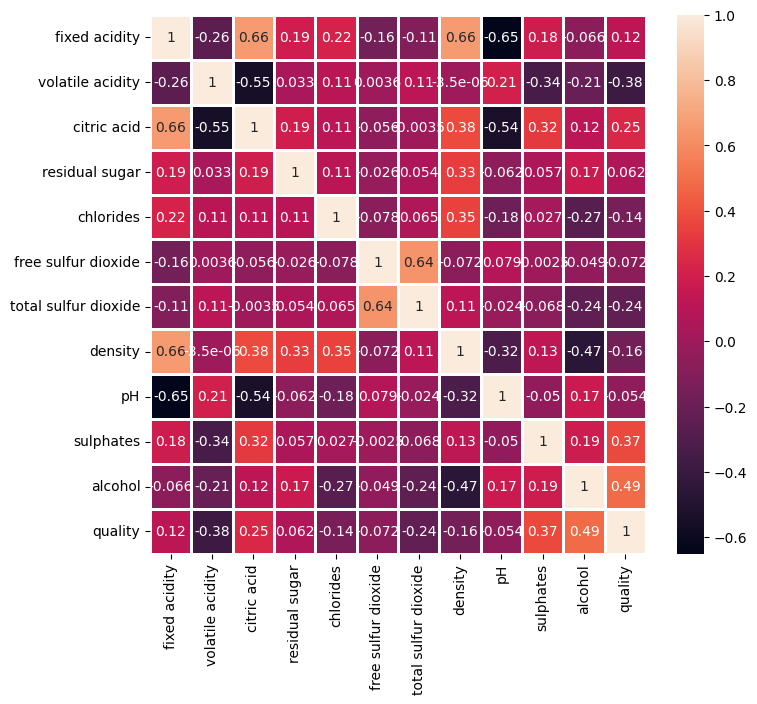

In [203]:
#Feature Engineering

import seaborn as sns

plt.figure(figsize=(8,7))
corr = df.corr()

sns.heatmap(data = corr,annot =  True,fmt = '.2g',linewidth = 1)
plt.show()


In [204]:
y = df['quality']
x = df.drop('quality',axis=1)


#finding 10 most important features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.07629564 0.09756969 0.08043404 0.07674814 0.07848569 0.07294132
 0.09945774 0.0812129  0.0758581  0.1154189  0.14557784]


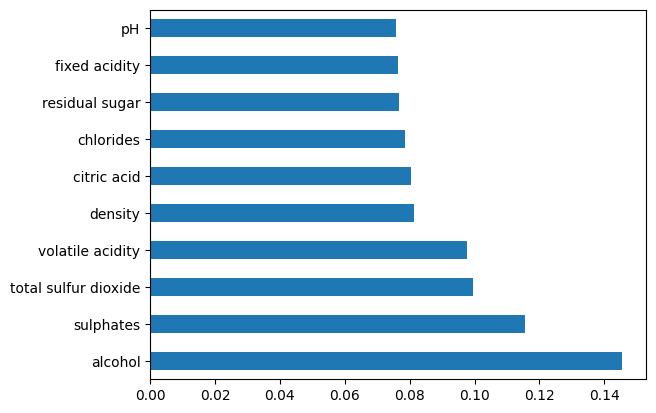

In [205]:
#10 most important features
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()


<Axes: >

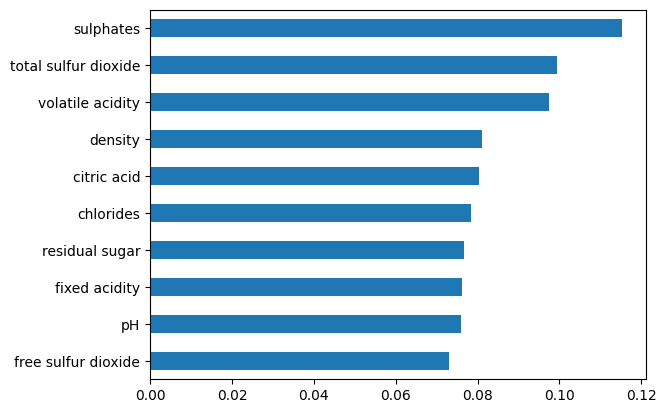

In [206]:
#10 least important features
feature_importances.nsmallest(10).plot(kind = 'barh')

In [207]:
#Data analysis and Visualization
for i in dict(feature_importances.nlargest(10)):
  if i in mappings:
    chart = pd.crosstab(index=df[i],columns=df['quality'])
    print("wine quality" + ":",mappings['quality'])
    print(i + ':',mappings[i])
    print(chart)
    print()
    chart.plot.bar()
    plt.show()

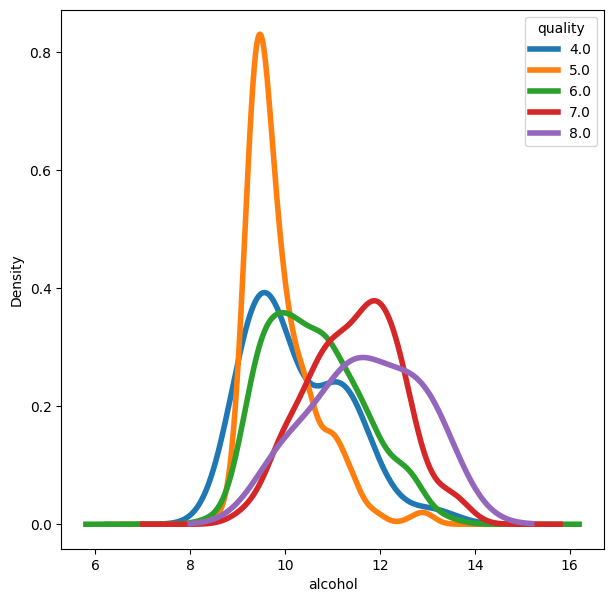

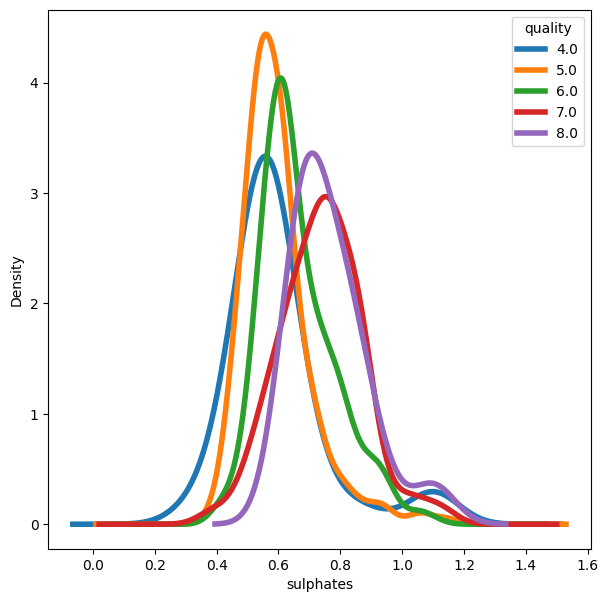

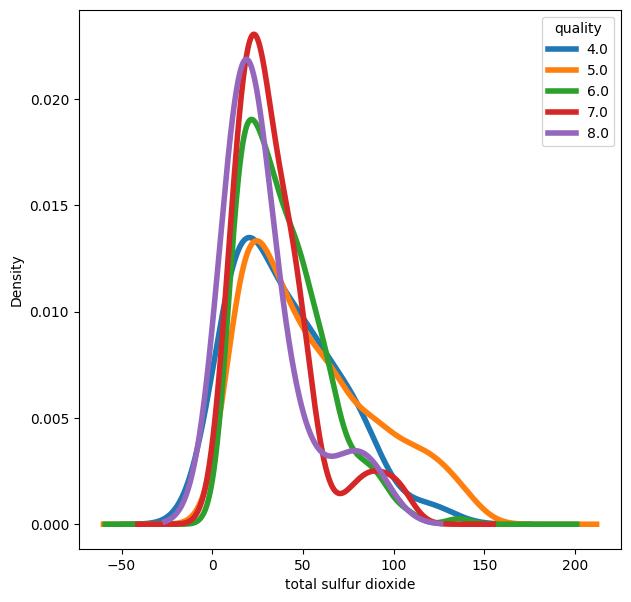

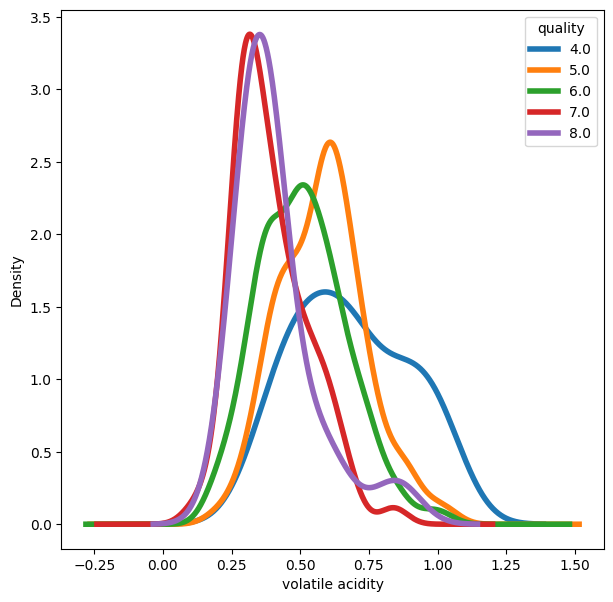

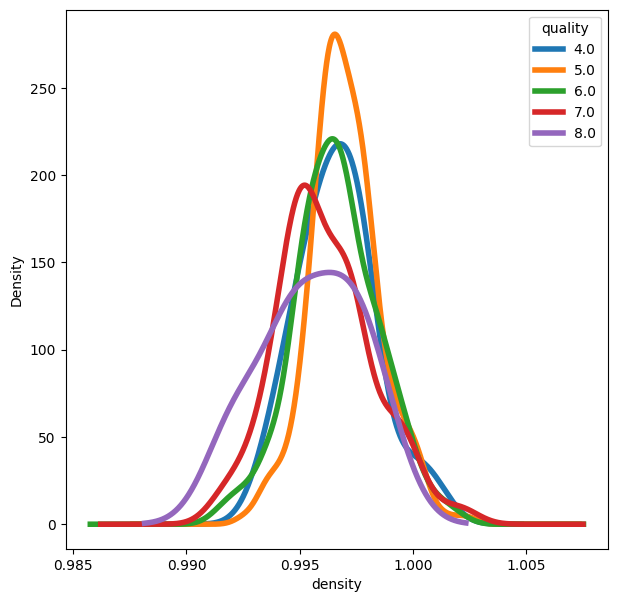

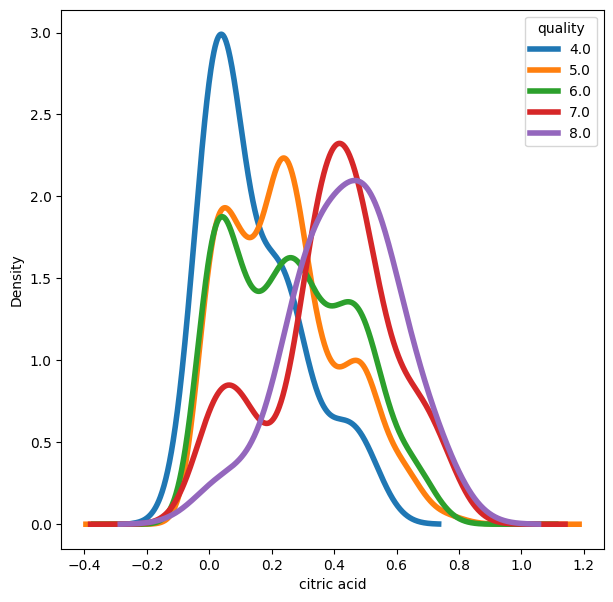

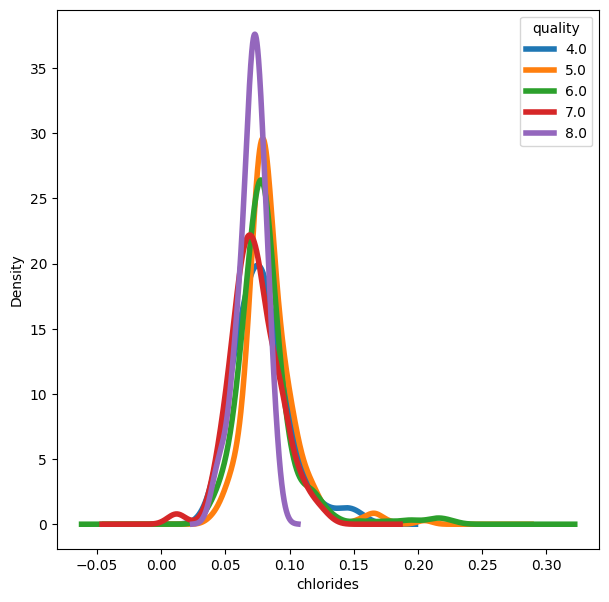

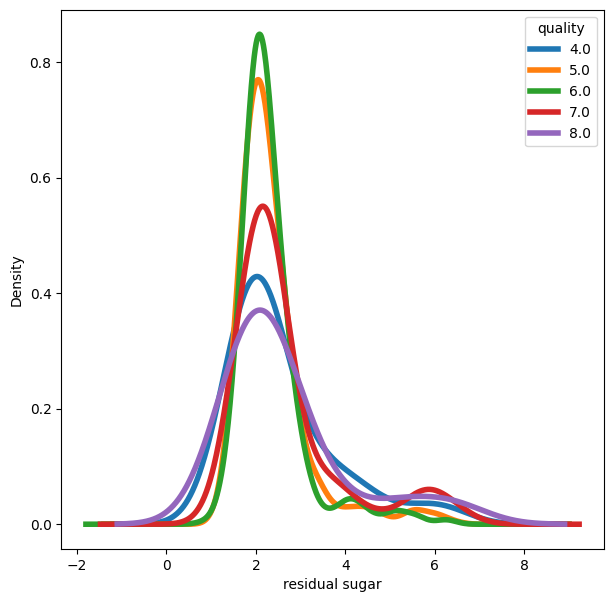

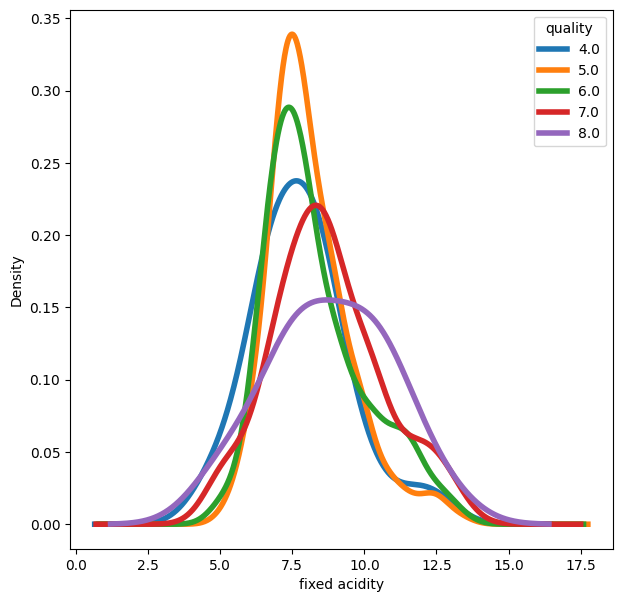

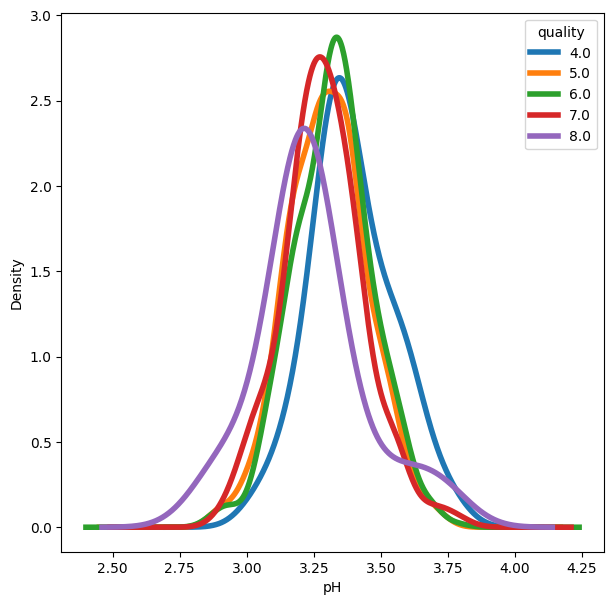

In [208]:
for i in dict(feature_importances.nlargest(10)):
  if i not in mappings:
     df_specific_column = df.pivot(columns = 'quality', values = i)
     df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(i)

features with hardly non overlapping distributions play a significant role in classifiaction of wine quality.

In [209]:
#Exploratory Model Building
from sklearn.model_selection import train_test_split
y = df['quality']
x = df.drop('quality', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [210]:
# #featuere scaling
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.tranform(x_test)

In [211]:
#Training ML model

from sklearn.naive_bayes import GaussianNB,MultinomialNB

model = GaussianNB()
model.fit(x_train,y_train)
y_pred =  model.predict(x_test)
print(model.score(x_test,y_test))


0.6157205240174672


In [212]:
model = MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.4410480349344978

In [213]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

model = RandomForestClassifier(n_estimators=100,random_state = 999)
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.6943231441048034

In [214]:
model = LGBMClassifier(n_estimators=100,random_state=999)
model.fit(x_train,y_train)
model.score(x_test,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 11
[LightGBM] [Info] Start training from score -3.521994
[LightGBM] [Info] Start training from score -0.859406
[LightGBM] [Info] Start training from score -0.907034
[LightGBM] [Info] Start training from score -2.055657
[LightGBM] [Info] Start training from score -4.178773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.6899563318777293

In [ ]:
#out of all the four random forest exhibits high accuracy